In [1]:
import pandas as pd

In [2]:
import spacy
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [3]:
doc=nlp('India and Iran have agreed to boost the economic viability of the strategic Chabahar port through various measures, including larger subsidies to merchant shipping firms using the facility, people familiar with the development said on Thursday.')

[(x.text,x.label_) for x in doc.ents]

[('India', 'GPE'), ('Iran', 'GPE'), ('Chabahar', 'GPE'), ('Thursday', 'DATE')]

In [4]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/"
file_path = "train.csv"
train_data = pd.read_csv(folder_path + file_path)
train_data.head() 

,id,title,abstract,category
0,2009.0642,Completely Self-Supervised Crowd Counting via ...,Dense crowd counting is a challenging task t...,cs
1,2010.13821,Wavelet Flow: Fast Training of High Resolution...,Normalizing flows are a class of probabilist...,cs
2,1904.12782,Transversally Elliptic Complex and Cohomologic...,This work is a continuation of our previous ...,math
3,2105.00878,On the Malliavin-Rubel theorem on small entire...,"In the early 1960s, P. Malliavin and L. A. R...",math
4,1906.04024,On the Odd Cycle Game and Connected Rules,We study the positional game where two playe...,math


In [5]:
from tqdm.auto import tqdm
tqdm.pandas()

In [6]:
def ner(text):
  doc = nlp(text)
  return [X.label_ for X in doc.ents]

In [7]:
ent = train_data["title"][0:50000].progress_apply(lambda x : ner(x))

  0%|          | 0/50000 [00:00<?, ?it/s]

In [8]:
ent=[x for sub in ent for x in sub]

In [9]:
from collections import Counter

In [10]:
counter=Counter(ent)
count=counter.most_common()

In [11]:
!pip install matplotlib==3.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

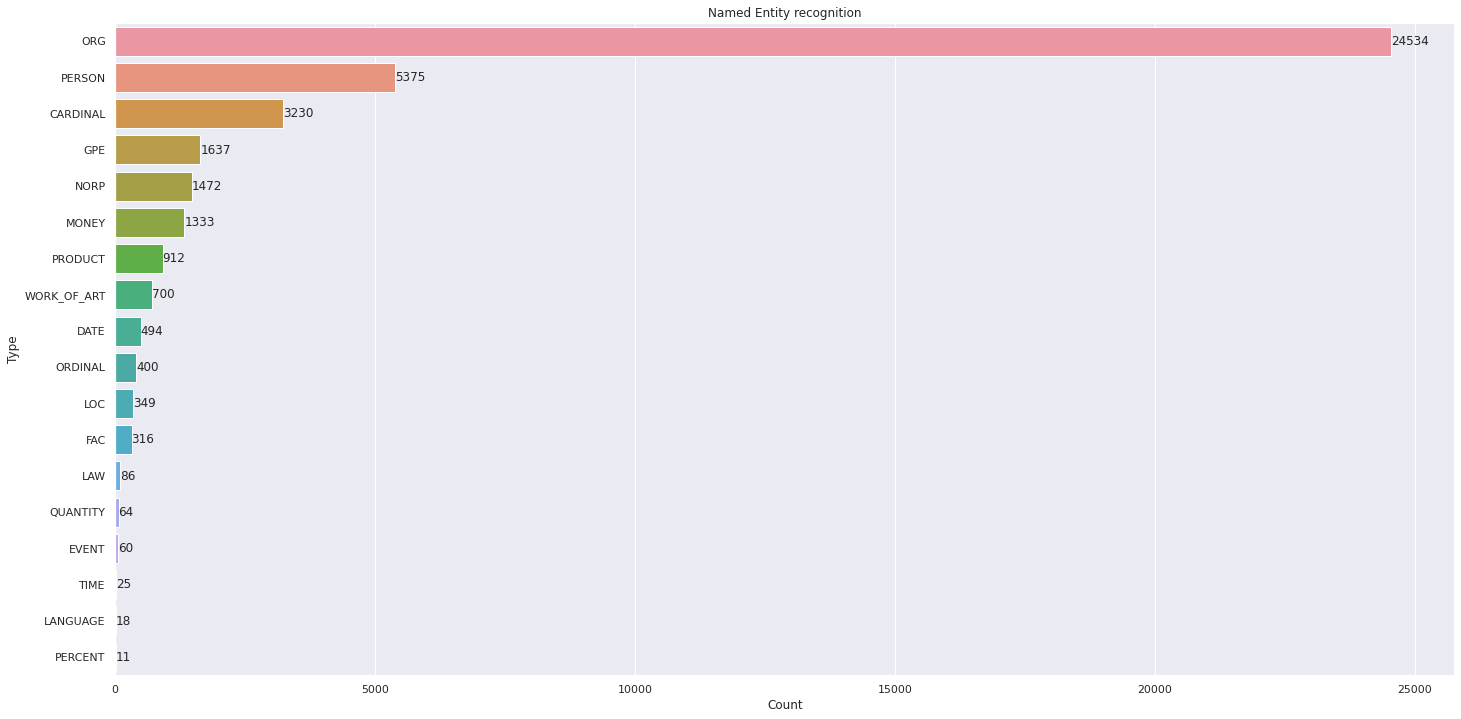

In [16]:
sns.set(rc={'figure.figsize':(24, 12)})
x,y=map(list,zip(*count))
ax = sns.barplot(x=y,y=x)
ax.set(xlabel = "Count", ylabel = "Type", title = "Named Entity recognition")
ax.bar_label(ax.containers[0])
plt.show()

In [18]:
def ner(text, ent="ORG"):
  doc = nlp(text)
  return [X.text for X in doc.ents if X.label_ == ent]


In [20]:
gpe=train_data['title'][0:50000].progress_apply(lambda x: ner(x, "ORG"))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

  0%|          | 0/50000 [00:00<?, ?it/s]

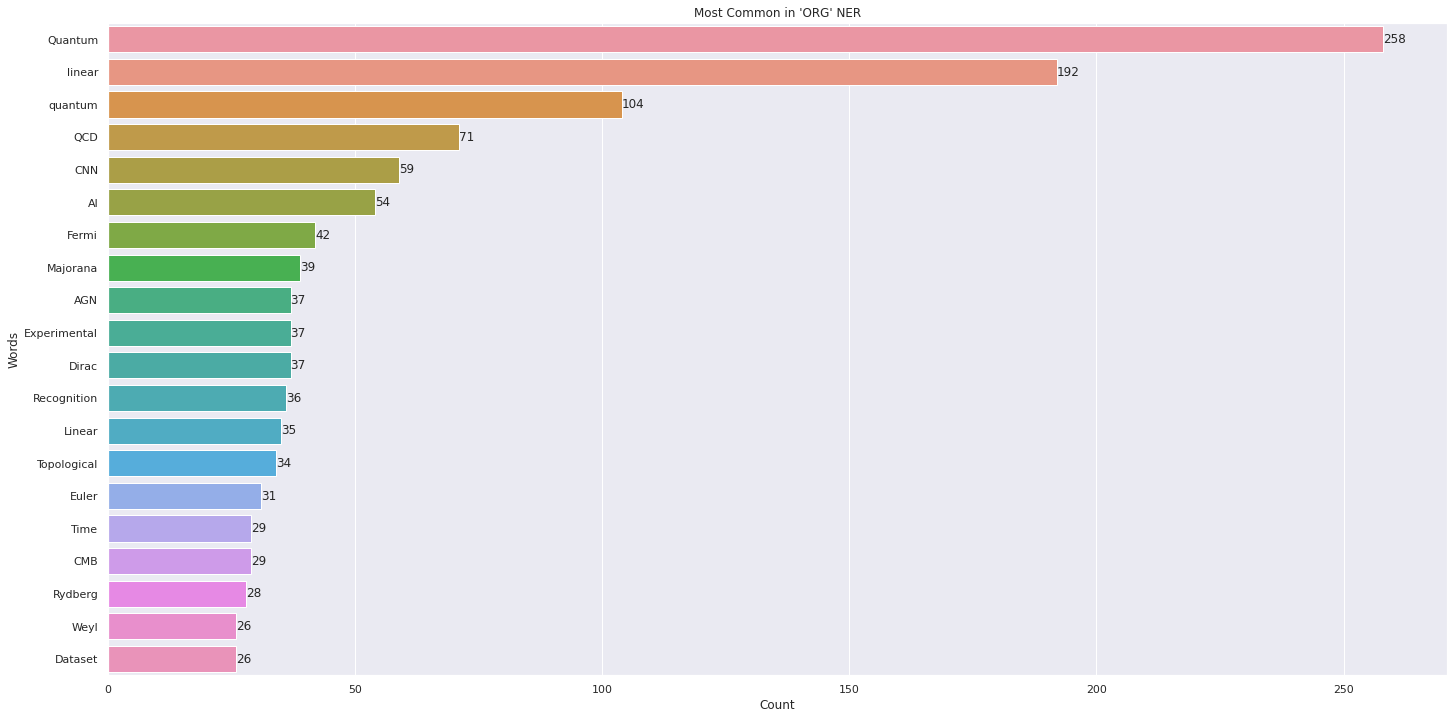

In [22]:
x,y=map(list,zip(*counter.most_common(20)))
ax = sns.barplot(x=y,y=x)
ax.set(xlabel = "Count", ylabel = "Words", title = "Most Common in 'ORG' NER")
ax.bar_label(ax.containers[0])
plt.show()

In [23]:
gpe=train_data['title'][0:50000].progress_apply(lambda x: ner(x, "PERSON"))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

  0%|          | 0/50000 [00:00<?, ?it/s]

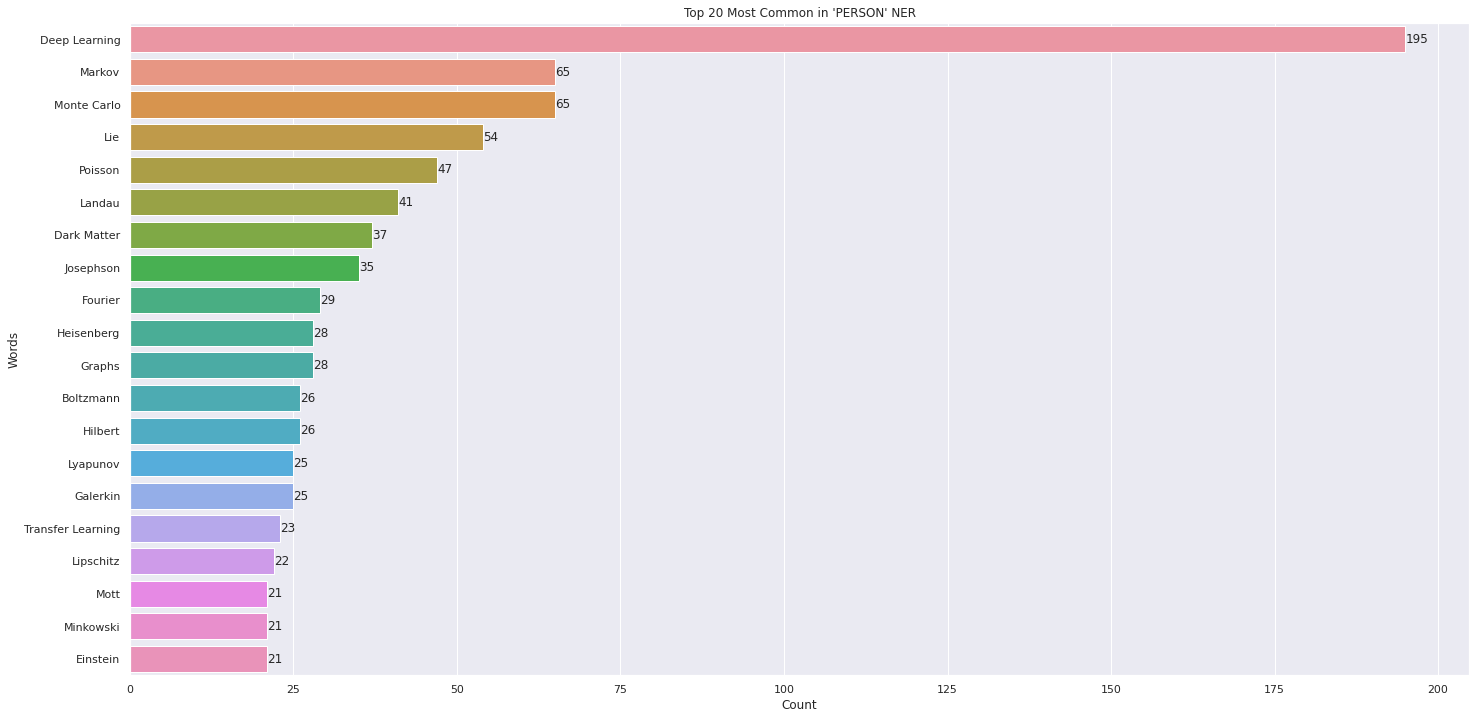

In [24]:
x,y=map(list,zip(*counter.most_common(20)))
ax = sns.barplot(x=y,y=x)
ax.set(xlabel = "Count", ylabel = "Words", title = "Top 20 Most Common in 'PERSON' NER")
ax.bar_label(ax.containers[0])
plt.show()

In [25]:
gpe=train_data['title'][0:50000].progress_apply(lambda x: ner(x, "WORK_OF_ART"))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

  0%|          | 0/50000 [00:00<?, ?it/s]

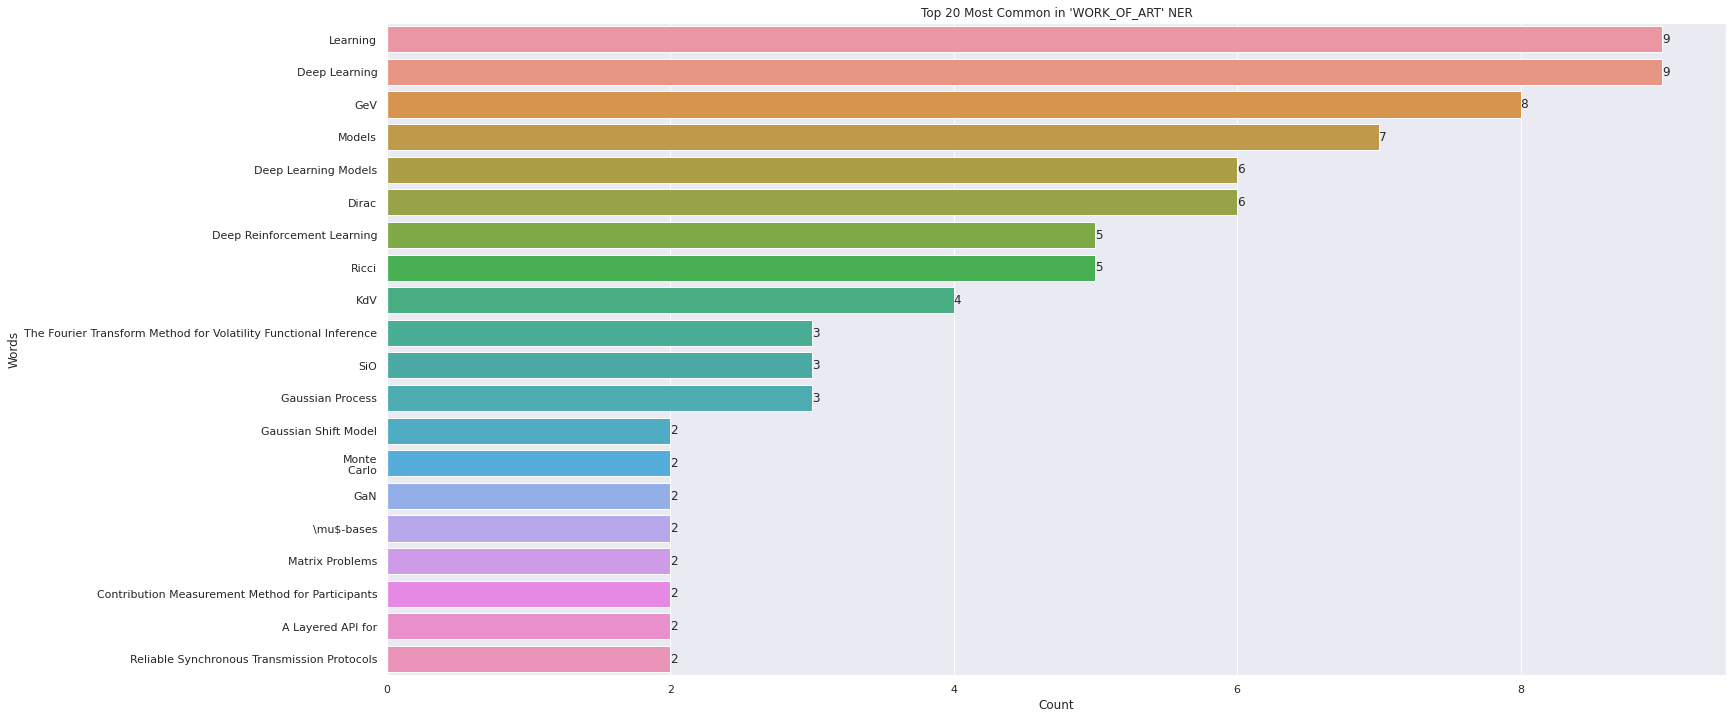

In [27]:
x,y=map(list,zip(*counter.most_common(20)))
ax = sns.barplot(x=y,y=x)
ax.set(xlabel = "Count", ylabel = "Words", title = "Top 20 Most Common in 'WORK_OF_ART' NER")
ax.bar_label(ax.containers[0])
plt.show()